### Project: Understaing Employees Attrition with Machine Learning
### Activity: Model Evaluation on Unsampled Data
### Author: Tawanda Nigel Chitapi
### Email: nigel.chitapi@gmail.com    
### Date: September 05, 2022
### Institution: BrainStation

During the EDA processing of the data in the EDA notebook, we acknowledged that the classes in the Attrition variable were extremely imnbalanced. Before we explore any sampling method, we will go ahead and fit the data into a logistic regression model and assess the results and evaluate the model in order to determine that indeed, the imbalanced data needs to be balanced

The goal is to build a model that predicts employee attrition of health care workers at a hospital and in the end determine which of the provided variables are most associated with employee attrition and which ones encourage employees to stay on the job.

We intend to build a high performing model with regards to precision and recall. With recall measuring how accurate our model is at predicting attrition overall and precision measuring how accurate our model is at predicting attrition correctly out of all attrition prediction it makes, some of which may include false positives. Above all the model with the better f1-score is preferred as the f1-score is the harmonic mean of the precision and recall score. A good f1-score would be closer to 1 meaning that there are low amounts of false negative and false positives

In [1]:
# import packages

# the data science trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# model selection tools
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import StandardScaler

# linear models
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
# load our clean data 

employee_df = pd.read_csv('data/employee_attrition.csv')

In [3]:
# sanity check to see if our data loaded successfully

employee_df.head()

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Other,Technical Degree,Admin,Administrative,Nurse,Other.1,Therapist,Divorced,Married,Single
0,1313919,41,0,1102,1,2,1,2,1,94,...,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,0,0,1,0,0,0,1,0


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeID                1676 non-null   int64
 1   Age                       1676 non-null   int64
 2   Attrition                 1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EmployeeCount             1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobLevel                  1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

In [5]:
# Establish the target and indepedent variables

# features
X = employee_df.drop('Attrition', axis=1)

# target
y = employee_df['Attrition']

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    stratify = y,
    random_state = 1
)

We have split our data into 70% train set and 30% test set split on our data 

We will now run the Logistic Regression Model without sampling our data 

Our dataset contains 50 columns, with the amount of data that we have (1676 rows), 50 columns are too wide a dimension puts our model at the risk of the curse of dimensionality. After we conducted feature engineering during data cleaning and processing, the number of features in our dataset incresed from 35 to 50. 

In order to best predict our target variable we need to conduct some feature selection and select only those variables that best predict out target variable.

To achieve this we will use the **Fisher - Chi-Squared** test and assess the derived p-values to select on the best predictor with p-values less than the threshold of **0.05.**

The Fisher - Chi-Squared test is applied on the training data because the selected features are used to train the model.

In [7]:
from sklearn.feature_selection import chi2

In [8]:
#Apply Chi-Squared (Chi2) test on the training data 

f_p_values = chi2(X_train, y_train)

f_p_values

(array([6.82343304e+04, 1.50176929e+02, 6.83118680e+02, 1.21441464e+02,
        6.42671874e-01, 0.00000000e+00, 3.91334272e+00, 1.26116619e-01,
        1.04621627e+01, 3.77819156e+00, 2.86296530e+01, 4.37108430e+00,
        1.38773188e+05, 1.55622511e+04, 3.66454572e-03, 0.00000000e+00,
        9.71387165e+01, 2.02287849e-03, 2.45937729e-03, 7.16478563e-01,
        0.00000000e+00, 2.51090253e+01, 3.41323545e+02, 1.78697869e+00,
        2.09866467e+00, 2.05666337e+02, 1.30899855e+02, 2.47531772e+01,
        1.28149499e+02, 2.22950949e+00, 1.17934719e+01, 1.42755155e+00,
        1.41092611e+00, 8.32297164e-02, 3.54741940e+00, 2.22000891e+00,
        1.15905065e-02, 1.13606214e+00, 2.07313077e+00, 1.82492580e+00,
        2.96564323e+00, 1.20986460e+00, 9.40338682e+00, 2.94625434e-01,
        1.07727961e+01, 1.55483469e+01, 9.71916427e+00, 5.53101533e+00,
        2.87935831e+01]),
 array([0.00000000e+000, 1.58594246e-034, 1.40191600e-150, 3.05894977e-028,
        4.22744926e-001, 1.0000000

The variable **f_p_values** refers to f-score, p-value values, the first array [0] represents f-scores and the second array [1] represent the p-values.

In [9]:
# create a series of p_values and match them to the relevant columns 

p_values = pd.Series(f_p_values[1],index = X.columns)

In [10]:
# sort the p_values in descending order 
p_values.sort_values(ascending = False , inplace = True)

Plot a bar graph of the column and relevant p_values to better identify and select preferred columns 

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

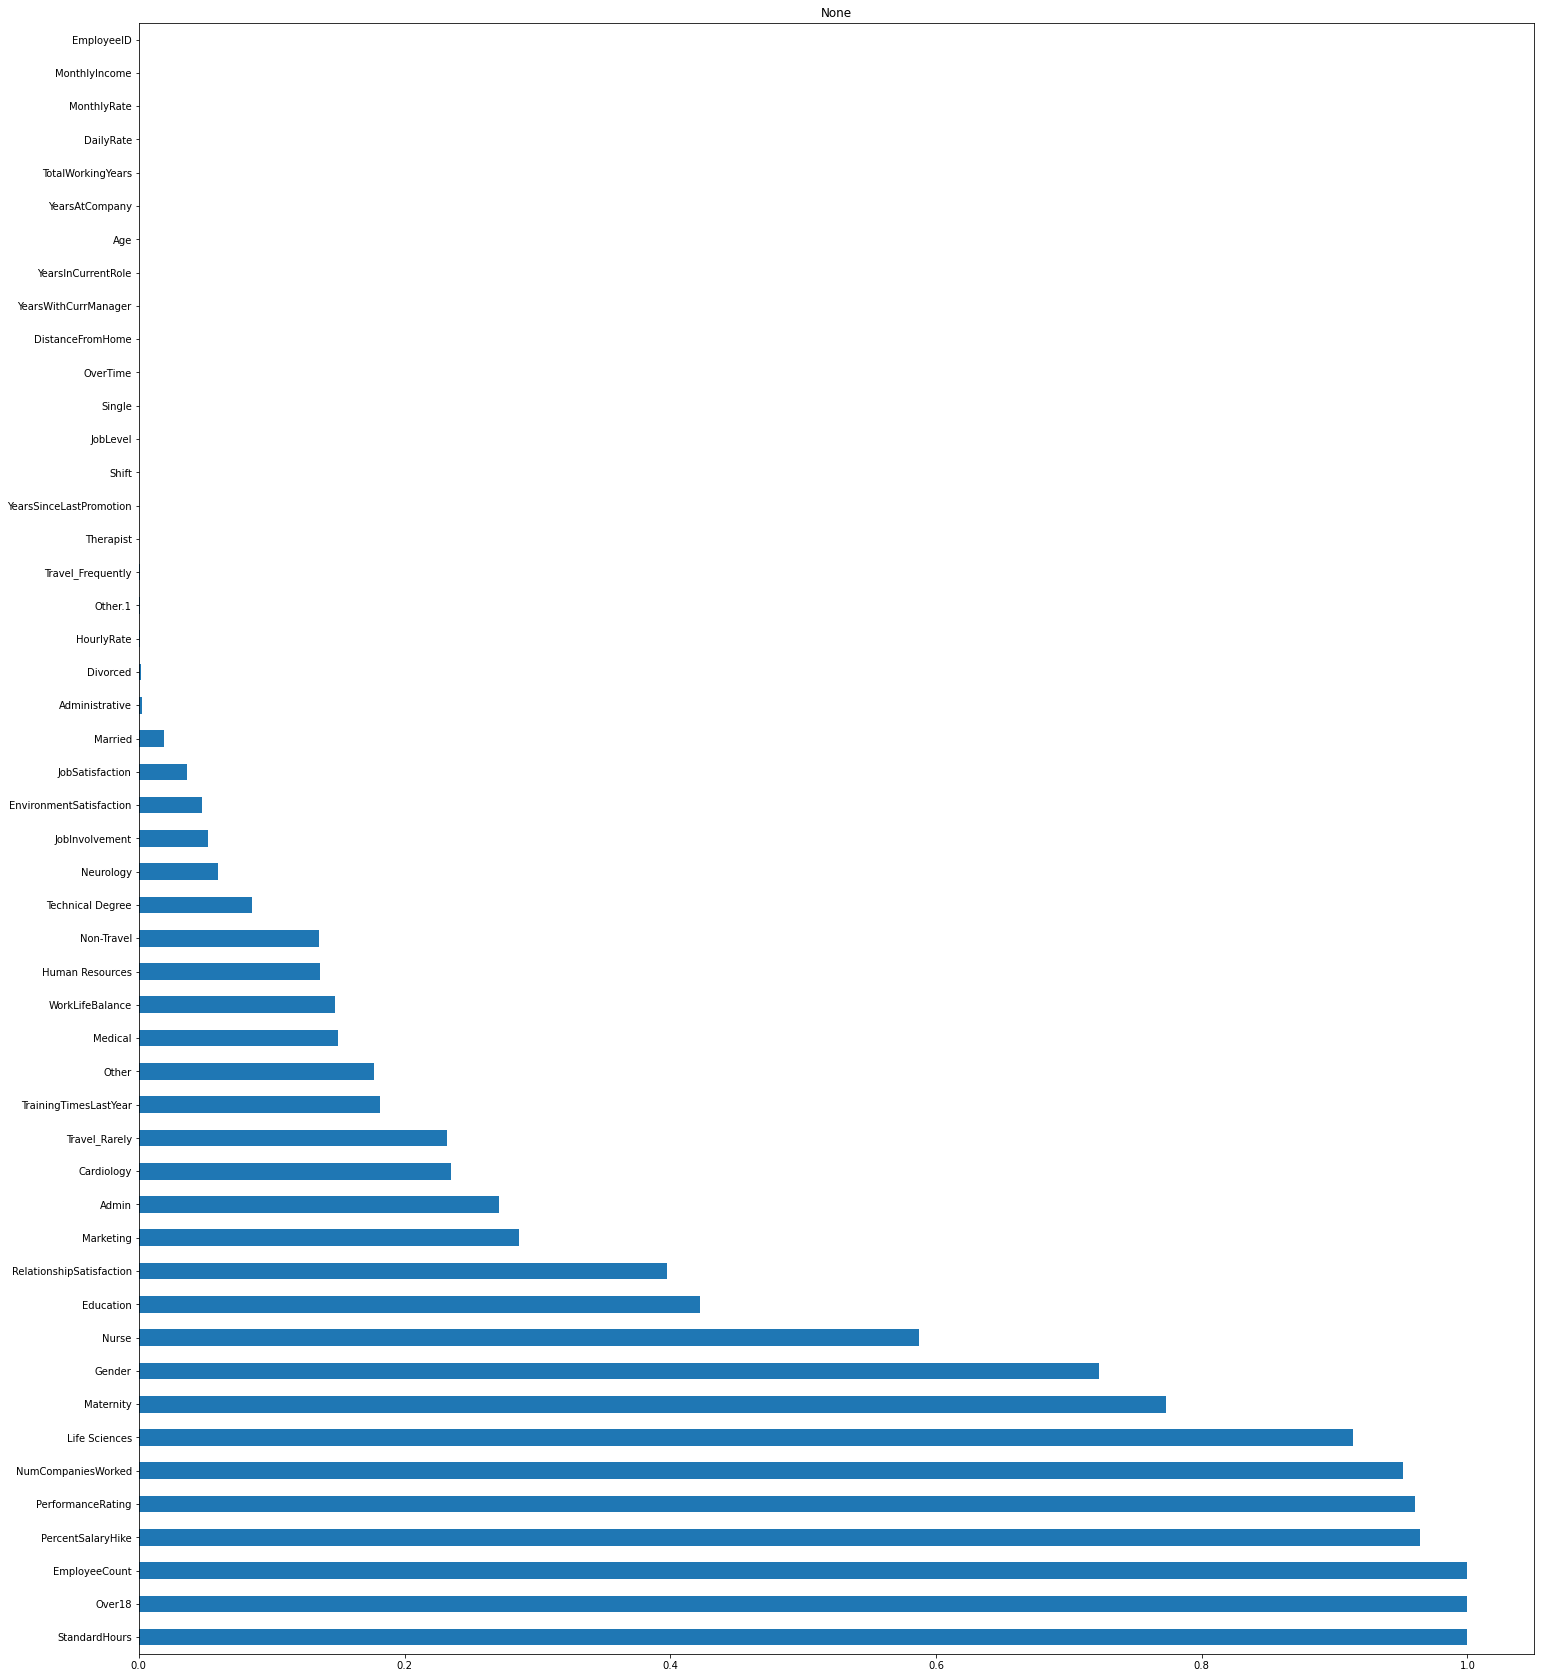

In [11]:
#Plot a bar graph
p_values.plot.barh(figsize= (25,30), subplots=True) 

In [12]:
# Newly Updated features
X = employee_df[['Age','DailyRate', 'DistanceFromHome', 'JobLevel','OverTime','Single',
               'Shift','TotalWorkingYears','Therapist', 'MonthlyRate', 'HourlyRate',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                 'YearsWithCurrManager','Travel_Frequently','Married', 'Divorced',
                 'Administrative']]

# target
y = employee_df['Attrition']

After observing the results from the plot above, we have selected features with p_value less than 0.05 as these will best predict our target variable. 

### Now that our features have been selected, we will go on to scale our data.

#### Before we fit our data into any model it is very important that we scale our data since our features do not contain the same degree of values in them, we must scale them so that they are centred at mean = 0 and variance = 1 at the same level.

In [13]:
# we will use a standard scalar to scale our data 

In [14]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler to the X_train data
ss = ss.fit(X_train)

# transform both the X_train and X_test data with the fitted scaler
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

_ss refers to (scaled by the standard scaler)

In [15]:
# Instantiate
employee_logit = LogisticRegression()

# Fit
employee_logit.fit(X_train_ss, y_train)

# Score
print(employee_logit.score(X_train_ss, y_train))
print(employee_logit.score(X_test_ss, y_test))

0.9420289855072463
0.9324055666003976


The model performed at 94% accuracy on the training data and 93% accuracy on the test data. These score are great because the delta between the two scores is only 1 percentage point and this could be deemed as a great performing model, however, at this point we can not deductively state that this is a great model.

We need to further granulate the performance metrics of the model and assess how accurate it is at predicting true positive and true negatives.

To achieve this we will derive a confusion matrix and a classification report to yeild the precision, recall, f1-score and accuracy. These particular metrics help us gain an understanding of our model performance. 

### Evaluation on Test Data

In [16]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

Evidently, as we can observe from above, our classes are imbalanced and are very few as well

In [17]:
# predict classification
y_test_pred = employee_logit.predict(X_test_ss)

In [18]:
# Generate the (raw) confusion matrix:
cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[437,   6],
       [ 28,  32]])

In [19]:
# generate confusion matrix in a dataframe format
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,437,6
true 1,28,32


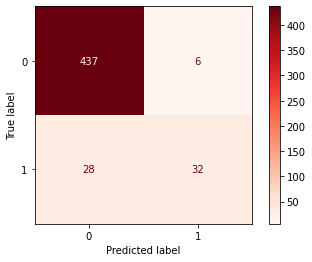

In [20]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(employee_logit, X_test_ss, y_test, cmap='Reds');

The model predicted 437 True Negatives, 32 True Positives, 28 False Positive and 6 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.


In [21]:
# Classification report
from sklearn.metrics import classification_report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       443
           1       0.84      0.53      0.65        60

    accuracy                           0.93       503
   macro avg       0.89      0.76      0.81       503
weighted avg       0.93      0.93      0.93       503



From the classification report we observe that the precision rate of the model at predicting attrition is 84% and the recall rate is 53% and f1-score is 65%.

Now as much as a precise model is prefered in this case of employee attrition a higher recall rate is preferred, this is to say, we need to be able to detected as much potential attrition as possible, even if the employees do not end up quiting their job. It is important to detect attrition and intiate conversation with the employee in question and potentially solve matters that might have led to attrition.

Having said that, in this case a high recall score is preferred and in order to achieve that we need to upsample our attrition and class in the training data in order to help the model train better and thus yeild an improved recall score

This notebook will end here and another notebook will be initiated where the upsampling of the data will occur as well as re-modelling of the data and re-evaluation of the data.